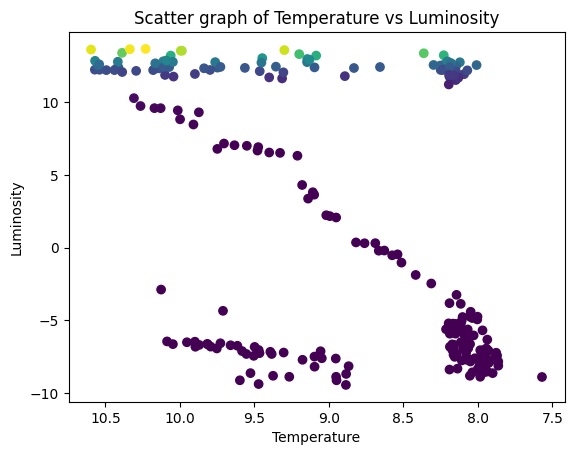

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = pd.read_csv("/Users/ilhaam.ahmed/Projects/intro_data_analysis_with_pandas/Phase 2/csv files/Stars.csv")
stars = pd.DataFrame(file)

x_values = stars['Temperature']
y_values = stars['Luminosity']

plt.scatter(np.log(x_values), np.log(y_values), c=y_values, cmap="viridis")

plt.gca().invert_xaxis()
plt.xlabel("Temperature")
plt.ylabel("Luminosity")
plt.title("Scatter graph of Temperature vs Luminosity")
plt.show()


What is the code doing:
1. I create variables for the x and y values. The x-values will be the Temperature column in the stars DataFrame and the y-values will be the Luminosity column in the stars DataFrame.
2. I then create a scatter graph that uses the logarithmic values of x as the x-axis and the equivalent for y.
3. In this case the color of the scatter points is determined by y-vals using the viridis color map.
4. I then label the x and y axis and give the graph a title.


The Hertzsprung-Russel diagram reveals various groupings of stars, these can be higlighted via color-coding. Like described below:
- One along the top where luminosity doesn't appear to be related to temperature. There's almost a flat line. (`Giants`)
- Another group near the bottom, where there is perhaps a gentle slope, where cooler stars are slightly less bright. (`White dwarves`)
- A line of stars from top left to bottom right, where cooler stars are definitely less bright. (`Main sequence`)
- A clump of stars at the end of the above line. (`Brown dwarves`)

The colour coding in my version of the diagram doesn't show this as it is based on spectral class rather than the types named above.

# Challenge
The challenge is to create another column to marks stars in the four given groups? Then make a version of the diagram with better colour coding.

The first step I will take is to group the different stars by their conditions. 

In [17]:
lum_log = np.log(stars['Luminosity'])
temp_log = np.log(stars['Temperature'])

dwarves = stars.loc[lum_log < -5]
dwarf_temp_log = np.log(dwarves['Temperature'])

white_dwarves = dwarves.loc[dwarf_temp_log >= 8.25]

brown_dwarves = dwarves.loc[dwarf_temp_log <= 8.25]

main_sequence = stars.loc[lum_log >= -5]
main_sequence = main_sequence.loc[lum_log <= 10]

giants = stars.loc[lum_log > 10]


As you can see above I group the stars by different categories.
1. I calculate the logarithm of the luminosity and then the temperature values in the df.
2. Then I filter the datafram further based on certain conditions:
    - 'giants': selects stars with luminosity greater than 10
    - 'white dwarves': filters on the condition that the dwarf_temp_log is greater than or equal to 8.25
    - 'main sequence': selects stars with luminosity between -5 and 10
    - 'brown dwarves': filters on the condition that the dwarf_temp_log is less than or equal to 8.25

In [21]:
# create the 'Group' column using the above
stars['Group'] = np.nan
stars.loc[stars.index.isin(giants.index), 'Group'] = 'Giants'
stars.loc[stars.index.isin(white_dwarves.index), 'Group'] = 'White Dwarves'
stars.loc[stars.index.isin(main_sequence.index), 'Group'] = 'Main Sequence'
stars.loc[stars.index.isin(brown_dwarves.index), 'Group'] = 'Brown Dwarves'

groups = stars['Group'].unique()
groups

array(['Brown Dwarves', 'Main Sequence', 'White Dwarves', 'Giants'],
      dtype=object)

I then create a new column called 'Group' in the stars df and intialise this with nan values.

I use an index based approach to assign labels to the group column. I define the unique groups.

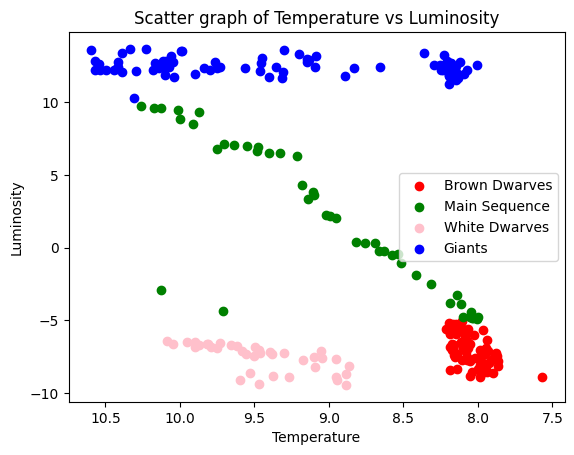

In [20]:
colors = ['red', 'green', 'pink', 'blue']

fig, ax = plt.subplots()
for group, color in zip(groups, colors):
    subset = stars[stars['Group'] == group]
    ax.scatter(np.log(subset['Temperature']), np.log(subset['Luminosity']), color=color, label=group)

plt.gca().invert_xaxis()
plt.xlabel("Temperature")
plt.ylabel("Luminosity")
plt.title("Scatter graph of Temperature vs Luminosity")
plt.legend()
plt.show()


What is the code doing:
- The groups variable, retrieves the unique values in the 'Group' column I created.
- I've also created a list to store the colors I want to use.
- 'fig, ax = plt.subplots()' this creates a new figure and axes for the plot
- I then start a loop which iterates over each group and its corresponding color at the same time, using the zip() function.
- Within the loop I created a subset variable which selects a subset of the stars DataFrame where the Group column matches the current group in the loop.
- I then created the scatter plot. It used the logarithm of temperature and luminosity values from the subset DataFrame and assign the colors and labels.
- I then invert the x-axis, create names for the x and y axis, as well as create a title.